In [1]:
"""
train_trafficsim.py
Romain, Clément et Loïc
28/09/2019
"""

# Imports
import pickle
import torch
import time

import matplotlib.pyplot as plt
import numpy as np

from algorithm.dqn import DQN
from algorithm.mlp import MLP
from environments.trafficsim import TrafficSim

Timestep : 9, score : 2.0, Time : 0.003 s
Timestep : 23, score : 2.0, Time : 0.004 s
Timestep : 45, score : 8.0, Time : 0.006 s
Timestep : 68, score : 4.0, Time : 0.007 s
Timestep : 81, score : 4.0, Time : 0.004 s
Timestep : 88, score : 0.0, Time : 0.002 s
Timestep : 101, score : 0.0, Time : 0.004 s
Timestep : 108, score : 0.0, Time : 0.002 s
Timestep : 130, score : 10.0, Time : 0.007 s
Timestep : 159, score : 14.0, Time : 0.009 s
Timestep : 170, score : 3.0, Time : 0.005 s
Timestep : 178, score : 1.0, Time : 0.003 s
Timestep : 187, score : 2.0, Time : 0.004 s
Timestep : 209, score : 7.0, Time : 0.009 s
Timestep : 224, score : 2.0, Time : 0.005 s
Timestep : 257, score : 13.0, Time : 0.012 s
Timestep : 271, score : 1.0, Time : 0.005 s
Timestep : 287, score : 9.0, Time : 0.006 s
Timestep : 302, score : 6.0, Time : 0.006 s
Timestep : 326, score : 6.0, Time : 0.013 s
Timestep : 338, score : 2.0, Time : 0.006 s
Timestep : 365, score : 10.0, Time : 0.011 s
Timestep : 383, score : 6.0, Time :

Timestep : 3163, score : 6.0, Time : 0.048 s
Timestep : 3185, score : 9.0, Time : 0.067 s
Timestep : 3225, score : 20.0, Time : 0.103 s
Timestep : 3248, score : 9.0, Time : 0.054 s
Timestep : 3268, score : 7.0, Time : 0.065 s
Timestep : 3289, score : 9.0, Time : 0.056 s
Timestep : 3311, score : 6.0, Time : 0.052 s
Timestep : 3333, score : 11.0, Time : 0.068 s
Timestep : 3357, score : 11.0, Time : 0.061 s
Timestep : 3371, score : 3.0, Time : 0.042 s
Timestep : 3390, score : 8.0, Time : 0.051 s
Timestep : 3403, score : 8.0, Time : 0.03 s
Timestep : 3429, score : 9.0, Time : 0.068 s
Timestep : 3456, score : 12.0, Time : 0.069 s
Timestep : 3469, score : 5.0, Time : 0.04 s
Timestep : 3485, score : 6.0, Time : 0.038 s
Timestep : 3501, score : 3.0, Time : 0.041 s
Timestep : 3525, score : 6.0, Time : 0.071 s
Timestep : 3543, score : 6.0, Time : 0.047 s
Timestep : 3557, score : 7.0, Time : 0.041 s
Timestep : 3592, score : 20.0, Time : 0.087 s
Timestep : 3605, score : 4.0, Time : 0.039 s
Timeste

Timestep : 7448, score : 18.0, Time : 0.122 s
Timestep : 7498, score : 21.0, Time : 0.143 s
Timestep : 7520, score : 8.0, Time : 0.059 s
Timestep : 7535, score : 3.0, Time : 0.048 s
Timestep : 7585, score : 24.0, Time : 0.16 s
Timestep : 7604, score : 5.0, Time : 0.057 s
Timestep : 7622, score : 4.0, Time : 0.058 s
Timestep : 7638, score : 3.0, Time : 0.046 s
Timestep : 7677, score : 15.0, Time : 0.121 s
Timestep : 7704, score : 7.0, Time : 0.072 s
Timestep : 7730, score : 14.0, Time : 0.075 s
Timestep : 7780, score : 26.0, Time : 0.143 s
Timestep : 7830, score : 15.0, Time : 0.143 s
Timestep : 7851, score : 3.0, Time : 0.059 s
Timestep : 7881, score : 12.0, Time : 0.091 s
Timestep : 7931, score : 20.0, Time : 0.147 s
Timestep : 7959, score : 14.0, Time : 0.094 s
Timestep : 8009, score : 37.0, Time : 0.141 s
Timestep : 8041, score : 19.0, Time : 0.094 s
Timestep : 8071, score : 12.0, Time : 0.082 s
Timestep : 8121, score : 24.0, Time : 0.146 s
Timestep : 8171, score : 28.0, Time : 0.13

Timestep : 15173, score : 35.0, Time : 0.158 s
Timestep : 15223, score : 30.0, Time : 0.155 s
Timestep : 15273, score : 33.0, Time : 0.155 s
Timestep : 15323, score : 27.0, Time : 0.153 s
Timestep : 15347, score : 9.0, Time : 0.089 s
Timestep : 15397, score : 27.0, Time : 0.154 s
Timestep : 15447, score : 29.0, Time : 0.155 s
Timestep : 15497, score : 21.0, Time : 0.172 s
Timestep : 15547, score : 26.0, Time : 0.157 s
Timestep : 15597, score : 23.0, Time : 0.151 s
Timestep : 15647, score : 21.0, Time : 0.165 s
Timestep : 15684, score : 15.0, Time : 0.125 s
Timestep : 15734, score : 23.0, Time : 0.18 s
Timestep : 15756, score : 9.0, Time : 0.06 s
Timestep : 15774, score : 6.0, Time : 0.069 s
Timestep : 15824, score : 28.0, Time : 0.162 s
Timestep : 15874, score : 25.0, Time : 0.173 s
Timestep : 15896, score : 8.0, Time : 0.062 s
Timestep : 15922, score : 10.0, Time : 0.083 s
Timestep : 15972, score : 31.0, Time : 0.153 s
Timestep : 16022, score : 30.0, Time : 0.157 s
Timestep : 16072, s

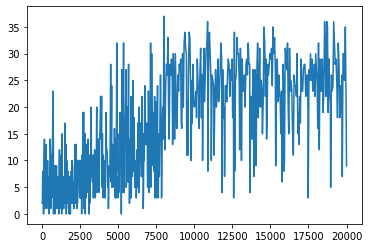

In [2]:
env = TrafficSim(3, 6, 6)

nb_steps = 20000

agent = DQN(env,
            MLP,
            replay_start_size=1000,
            replay_buffer_size=50000,
            gamma=0.99,
            update_target_frequency=500,
            minibatch_size=32,
            learning_rate=1e-3,
            initial_exploration_rate=1,
            final_exploration_rate=0.02,
            final_exploration_step=5000,
            adam_epsilon=1e-8,
            update_frequency=4,
            logging=True)


agent.learn(timesteps=nb_steps, verbose=True)
agent.save()

logdata = pickle.load(open("log_data.pkl", 'rb'))
scores = np.array(logdata['Episode_score'])
plt.plot(scores[:, 1], scores[:, 0])
plt.show()


In [ ]:
env = TrafficSim(3, 6, 6)

agent = DQN(env, MLP)

agent.load('network.pth')

obs = env.reset()
returns = 0
for i in range(10000):
    obs = torch.FloatTensor(obs).cuda()
    action = agent.predict(obs)
    obs, rew, done, info = env.step(action)
    env.render()
    time.sleep(0.5)
    returns += rew
    if done:
        obs = env.reset()
        print("Episode score: ", returns)
        returns = 0


Episode score:  27
Episode score:  23
Episode score:  27
Episode score:  31
Episode score:  23
